# Image Classifier From Scratch :

General steps in image classification.

    * load dataset and normalize it
    * Define CNN architechture
    * compute loss
    * Train network
    * Test neteork with test data 

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Load Dataset :

In [0]:
# rquired transforms
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),
                                                     (0.5,0.5,0.5))])

In [4]:
# create train and test dataset
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, transform = transform, download=True)
testset = torchvision.datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
# create train and test dataloader
trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size=4, shuffle=True, num_workers=3)
testloader = torch.utils.data.DataLoader(dataset=testset, batch_size=4, shuffle=True, num_workers=3)

In [0]:
# initialise classes in dataset

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

torch.Size([3, 36, 138])


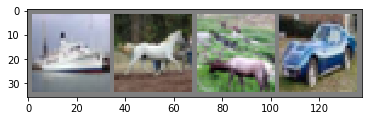

In [11]:
# visulalise some of training image
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5
    print(img.size())
    plt.imshow(np.transpose(img, (1,2,0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [14]:
# lets see corresponding classes to above shown images by using their labels
print(" ".join(classes[labels[j]] for j in range(len(labels))))

ship horse deer car


# CNN

In [107]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2)
        # self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # print(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # x = x.view(-1, 16*5*5)
        x = torch.flatten(input= x, start_dim=1) # if batch size in greater than one we should keep start dim to 1(check docs["https://pytorch.org/docs/stable/torch.html#torch.flatten"])
        # print(len(x),x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [108]:
net(torch.randn(1,3,32,32))

tensor([[ 0.0981, -0.0477, -0.1232, -0.0989, -0.1398, -0.0173, -0.1312,  0.0103,
          0.0178, -0.0162]], grad_fn=<AddmmBackward>)

# Loss Fn

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

# Training

In [110]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        images, labels = data
        # print(images)

        optimizer.zero_grad()

        outputs = net(images)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        if i % 2000 == 1999:
            print("(epoch - i - loss)")
            print(f"{epoch+1, i+1, running_loss/2000}")
            running_loss = 0.0

print('finished training')

(epoch - i - loss)
(1, 2000, 2.3031834638118744)
(epoch - i - loss)
(1, 4000, 2.3009612324237825)
(epoch - i - loss)
(1, 6000, 2.2970324778556823)
(epoch - i - loss)
(1, 8000, 2.2852041249275206)
(epoch - i - loss)
(1, 10000, 2.252576214134693)
(epoch - i - loss)
(1, 12000, 2.157323700964451)
(epoch - i - loss)
(2, 2000, 2.0574946203827857)
(epoch - i - loss)
(2, 4000, 1.9938174290657042)
(epoch - i - loss)
(2, 6000, 1.9435593725144864)
(epoch - i - loss)
(2, 8000, 1.8979395029246806)
(epoch - i - loss)
(2, 10000, 1.8396917059123516)
(epoch - i - loss)
(2, 12000, 1.7835840275287629)
finished training


# Save trained Model

In [0]:
torch.save(net.state_dict(), "./cifar10_net.pth")

# Inference

torch.Size([3, 36, 138])
cat horse dog dog


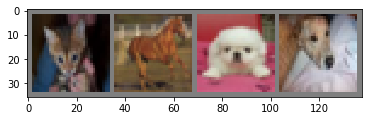

In [119]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(" ".join(classes[labels[j]] for j in range(len(images))))

In [120]:
net = Net()
net.load_state_dict(torch.load("./cifar10_net.pth"))

<All keys matched successfully>

In [0]:
outputs = net(images)

In [124]:
outputs

tensor([[-2.5184, -2.1688,  1.1195,  1.2422,  1.6528,  1.5685,  2.1575,  1.2647,
         -2.9330, -2.0155],
        [-1.7064, -1.8281,  1.2300,  0.5704,  1.6336,  0.7527,  1.6425,  0.9609,
         -2.4279, -1.2825],
        [-0.7301, -2.0021,  0.8723,  0.6884,  0.6707,  1.7275, -0.8411,  1.5556,
         -0.7021, -1.8302],
        [-0.9134, -1.6191,  0.9877,  1.4548,  0.4268,  1.8262,  0.4303, -0.1885,
         -1.3670, -2.1004]], grad_fn=<AddmmBackward>)

In [122]:
_, predicted = torch.max(outputs, 1)
predicted

tensor([6, 6, 5, 5])

In [123]:
" ".join(classes[labels[j]] for j in range(len(images)))

'cat horse dog dog'

# Inference on Whole Dataset : 

In [125]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy : {100 * correct/total}")

Accuracy : 36.53
